<a href="https://colab.research.google.com/github/DariaPrzytula/Data-Science/blob/main/COVID_19_Coronavirus_Pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly.express as px

In [2]:
covid = pd.read_csv('COVID-19 Coronavirus.csv',  usecols=['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths'])
covid.head()


,Country,Population,Continent,Total Cases,Total Deaths
0,Afghanistan,40462186,Asia,177827,7671
1,Albania,2872296,Europe,273870,3492
2,Algeria,45236699,Africa,265691,6874
3,Andorra,77481,Europe,40024,153
4,Angola,34654212,Africa,99194,1900


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       225 non-null    object
 1   Population    225 non-null    int64 
 2   Continent     225 non-null    object
 3   Total Cases   225 non-null    int64 
 4   Total Deaths  225 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.9+ KB


In [4]:
covid['Continent'].value_counts()

Africa                             58
Asia                               49
Europe                             48
Latin America and the Caribbean    48
Oceania                            17
Northern America                    5
Name: Continent, dtype: int64

In [5]:
#Total cases in each continent

covid_Africa = covid[covid['Continent'] == 'Africa']
sum_Total_cases_Africa = covid_Africa['Total Cases'].sum()
covid_Asia = covid[covid['Continent'] == 'Asia']
sum_Total_cases_Asia = covid_Asia['Total Cases'].sum()
covid_Europe = covid[covid['Continent'] == 'Europe']
sum_Total_cases_Europe = covid_Europe['Total Cases'].sum()
covid_Latin = covid[covid['Continent'] == 'Latin America and the Caribbean']
sum_Total_cases_Latin = covid_Latin['Total Cases'].sum()
covid_Oceania = covid[covid['Continent'] == 'Oceania']
sum_Total_cases_Oceania = covid_Oceania['Total Cases'].sum()
covid_NorthernAmerica  = covid[covid['Continent'] == 'Northern America']
sum_Total_cases_NorthernAmerica  = covid_NorthernAmerica['Total Cases'].sum()

total_cases = {'Africa' : sum_Total_cases_Africa, 'Asia' : sum_Total_cases_Asia, 'Europe' : sum_Total_cases_Europe, 'Latin America and the Caribbean': sum_Total_cases_Latin, 'Oceania':sum_Total_cases_Oceania, 'Northern America' :  sum_Total_cases_NorthernAmerica}
total_cases_df = pd.DataFrame(data = total_cases, index=['Total cases']) 
total_cases_df 

,Africa,Asia,Europe,Latin America and the Caribbean,Oceania,Northern America
Total cases,11764207,140957179,180332483,67509231,5647957,85364770


In [6]:
#Total deaths in each continent

sum_Total_deaths_Africa = covid_Africa['Total Deaths'].sum()
sum_Total_deaths_Asia = covid_Asia['Total Deaths'].sum()
sum_Total_deaths_Europe = covid_Europe['Total Deaths'].sum()
sum_Total_deaths_Latin = covid_Latin['Total Deaths'].sum()
sum_Total_deaths_Oceania = covid_Oceania['Total Deaths'].sum()
sum_Total_deaths_NorthernAmerica  = covid_NorthernAmerica['Total Deaths'].sum()

total_deaths = {'Africa' : sum_Total_deaths_Africa, 'Asia' : sum_Total_deaths_Asia, 'Europe' : sum_Total_deaths_Europe, 'Latin America and the Caribbean': sum_Total_deaths_Latin, 'Oceania':sum_Total_deaths_Oceania, 'Northern America' :  sum_Total_deaths_NorthernAmerica}
total_deaths_df = pd.DataFrame(data = total_deaths, index=['Total deaths']) 
total_deaths_df 

,Africa,Asia,Europe,Latin America and the Caribbean,Oceania,Northern America
Total deaths,252873,1405003,1775727,1686828,9336,1046062


In [7]:
#Continent population 

population_Africa = covid_Africa['Population'].sum()
population_Asia = covid_Asia['Population'].sum()
population_Europe = covid_Europe['Population'].sum()
population_Latin = covid_Latin['Population'].sum()
population_Oceania = covid_Oceania['Population'].sum()
population_NorthernAmerica  = covid_NorthernAmerica['Population'].sum()

population = {'Africa' : population_Africa, 'Asia' : population_Asia, 'Europe' : population_Europe, 'Latin America and the Caribbean': population_Latin, 'Oceania':population_Oceania, 'Northern America' :  population_NorthernAmerica}
population_df = pd.DataFrame(data = population, index=['Continent population']) 
population_df 

,Africa,Asia,Europe,Latin America and the Caribbean,Oceania,Northern America
Continent population,1396751613,4668689344,748420351,661325824,43437948,372846593


In [8]:
SumTable = pd.concat(objs=[total_deaths_df, total_cases_df, population_df,], axis=0)
SumTable = SumTable.T
SumTable = SumTable.reset_index()
SumTable
#SumTable['Uninfected'] = SumTable['Continent population'] - SumTable['Total cases']
#SumTable
#Table = SumTable.drop(columns ='Continent population')
#Table



,index,Total deaths,Total cases,Continent population
0,Africa,252873,11764207,1396751613
1,Asia,1405003,140957179,4668689344
2,Europe,1775727,180332483,748420351
3,Latin America and the Caribbean,1686828,67509231,661325824
4,Oceania,9336,5647957,43437948
5,Northern America,1046062,85364770,372846593


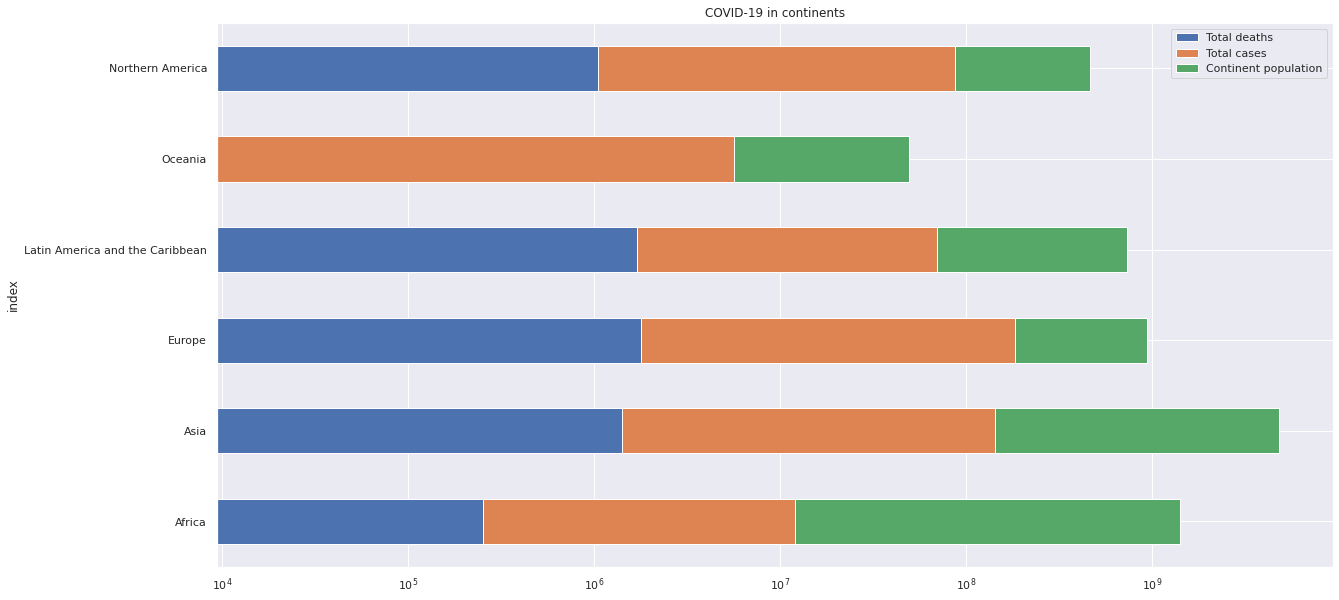

In [9]:
SumTable.plot(kind='barh', x= 'index' , stacked=True,  figsize=(20,10), logx= True, title = 'COVID-19 in continents' )
plt.style.use('ggplot')